# Crack tip analysis

> use ParaView output raw crack tip trajectory, see [PDcracktip](https://github.com/lyyc199586/pvfilters)
 
example csv input:
```csv
"Time","Points:0","Points:1","Points:2"
0,50,0,0
0.25,50,0,0
0.5,50,0,0
...
```

## Separate analysis of crack tip trajectory, length and velocity

,Time,Smoothed:0,Smoothed:1
0,0.00,50.000000,0.000000
1,0.25,50.000000,0.000000
2,0.50,50.000000,0.000000
3,0.75,50.000000,0.000000
4,1.00,50.000000,0.000000
...,...,...,...
276,69.00,99.436760,10.424936
277,69.25,99.678202,10.409896
278,69.50,99.898002,10.413722
279,69.75,100.035782,10.446984


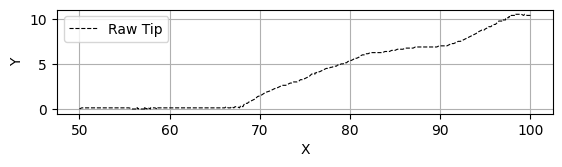

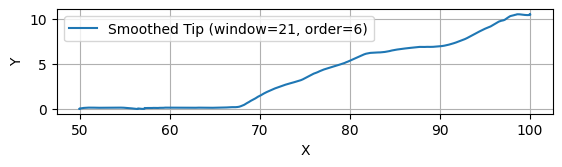

In [11]:
from cm_vis.fem.cracktip import CrackTipAnalyzer

analyzer = CrackTipAnalyzer("../data/tip/coh_p1_l0.625_tip.csv")
analyzer.set_savgol_params(window_length=21, poly_order=6)
analyzer.plot_trajectory()
analyzer.calc_smooth_trajectory(plot=True)

0      0.000000e+00
1      2.131628e-14
2      3.552714e-14
3      4.973799e-14
4      4.973799e-14
           ...     
276    5.178972e+01
277    5.203164e+01
278    5.225147e+01
279    5.239321e+01
280    5.247494e+01
Name: Smoothed Length, Length: 281, dtype: float64

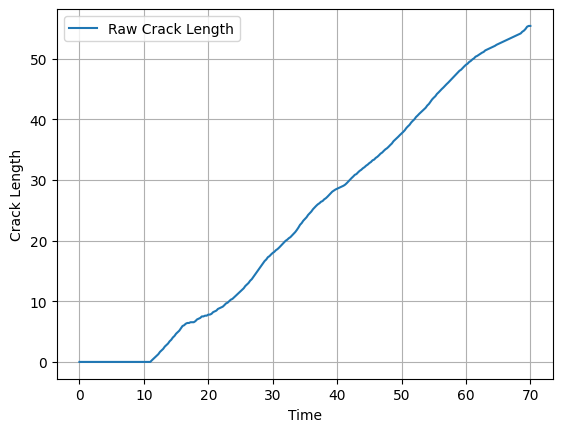

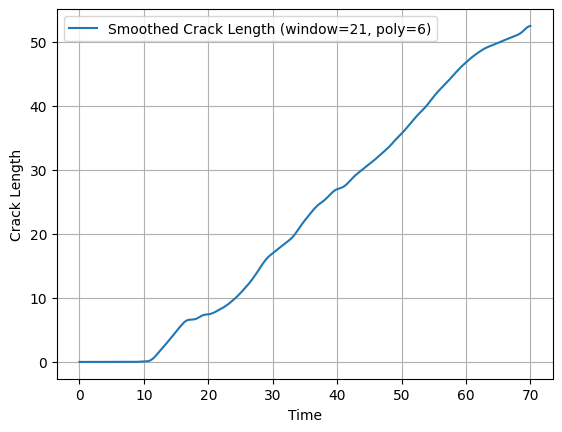

In [12]:
analyzer.calc_crack_length(plot=True)
analyzer.calc_crack_length(use_smoothed=True, plot=True)

0      0.000000e+00
1      8.526513e-14
2      5.684342e-14
3      5.684342e-14
4      0.000000e+00
           ...     
276    9.143982e-01
277    9.676432e-01
278    8.793315e-01
279    5.669538e-01
280    3.269309e-01
Name: Smoothed Velocity, Length: 281, dtype: float64

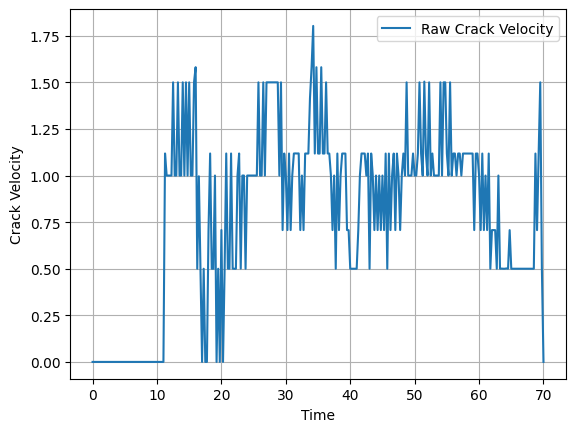

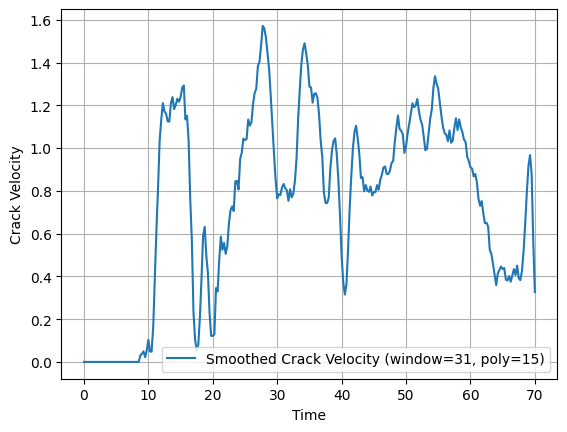

In [9]:
analyzer.calc_crack_velocity(plot=True)
analyzer.calc_crack_velocity(use_smoothed=True, plot=True)

In [14]:
# save
analyzer.save_to_csv("../data/tip/test_tip_out.csv")

## Complete analysis at once

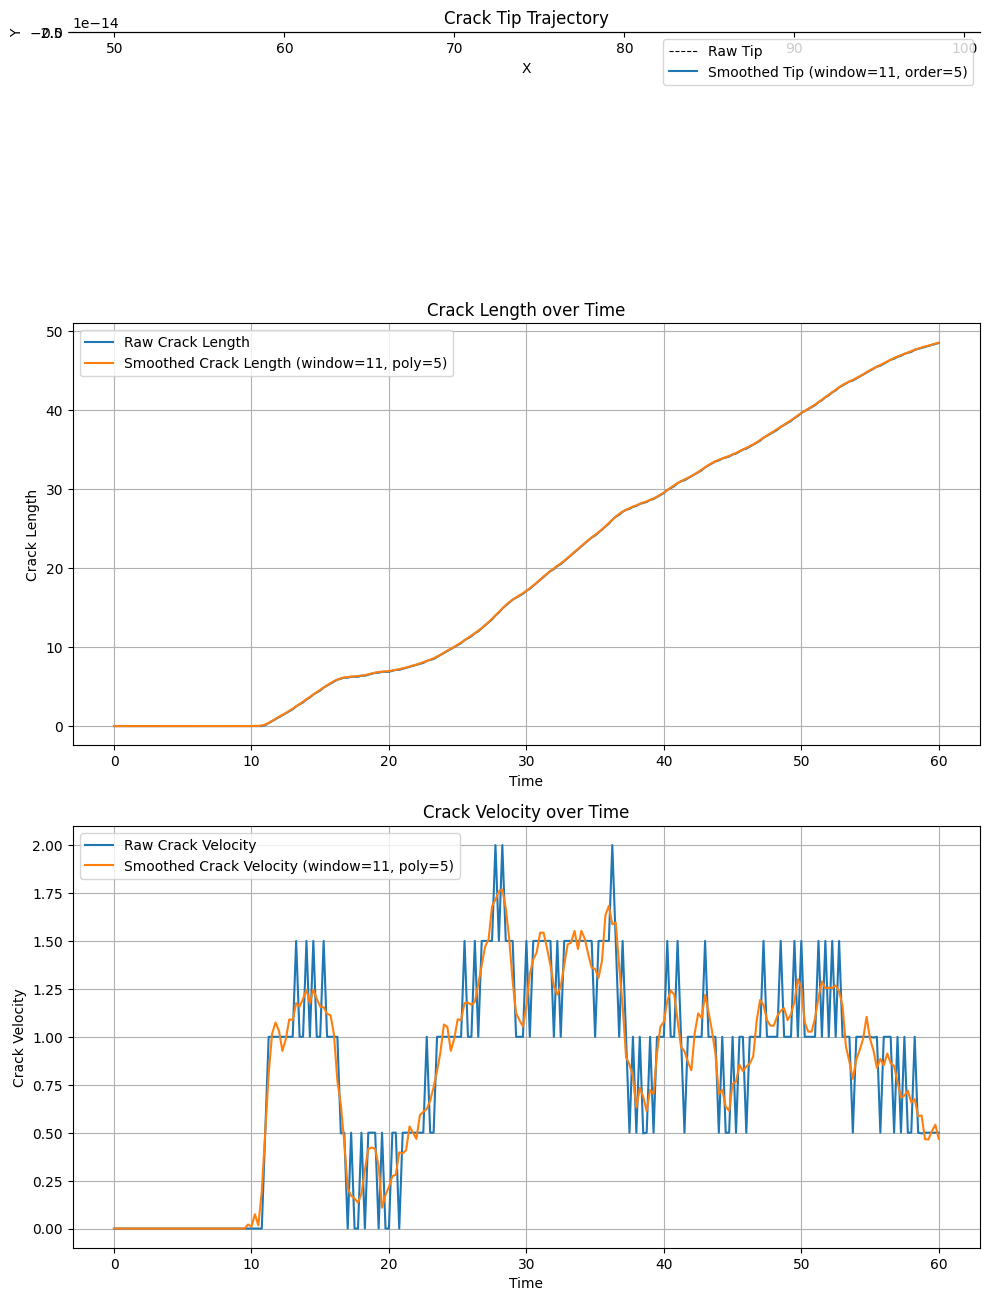

In [6]:
from cm_vis.fem.cracktip import CrackTipAnalyzer

# filename = "coh_p1_l0.625_tip_d0.5"
filename = "coh_cf_p1_l0.625_tip_d0.5"
filepath = f"../data/tip/{filename}.csv"

# smooth params
window_length = 11
poly_order = 5

analyzer = CrackTipAnalyzer(filepath)
analyzer.set_savgol_params(window_length, poly_order)
analyzer.analyze()
analyzer.save_to_csv(f"../data/tip/{filename}_wl{window_length}_po{poly_order}.csv")